In [5]:
from scipy.io.matlab import loadmat
from torch.fft import fft2
from torch import tensor, zeros
from torchvision.io import write_png
from os import makedirs
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [3]:
sampling_rate = 256
file = loadmat('data/EEG/FC.mat')
cells = file['FC']

In [4]:
subject = cells[0][0][0]

In [41]:
def create_spectrogram(recording):
    stft = librosa.stft(recording[:,0].reshape(-1), n_fft=8)
    spectrogram1 = np.abs(stft)
    stft = librosa.stft(recording[:,1].reshape(-1), n_fft=8)
    spectrogram2 = np.abs(stft)
    merged = np.zeros((3, spectrogram1.shape[0], spectrogram1.shape[1]))
    merged[0, :, :] = spectrogram1
    merged[1, :, :] = spectrogram2
    return merged
    

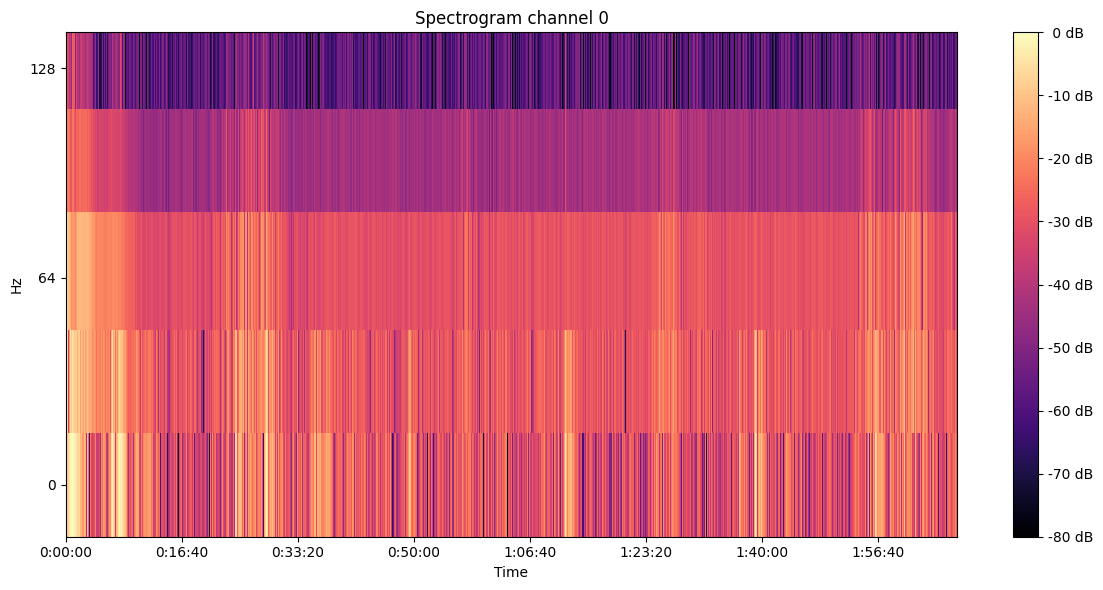

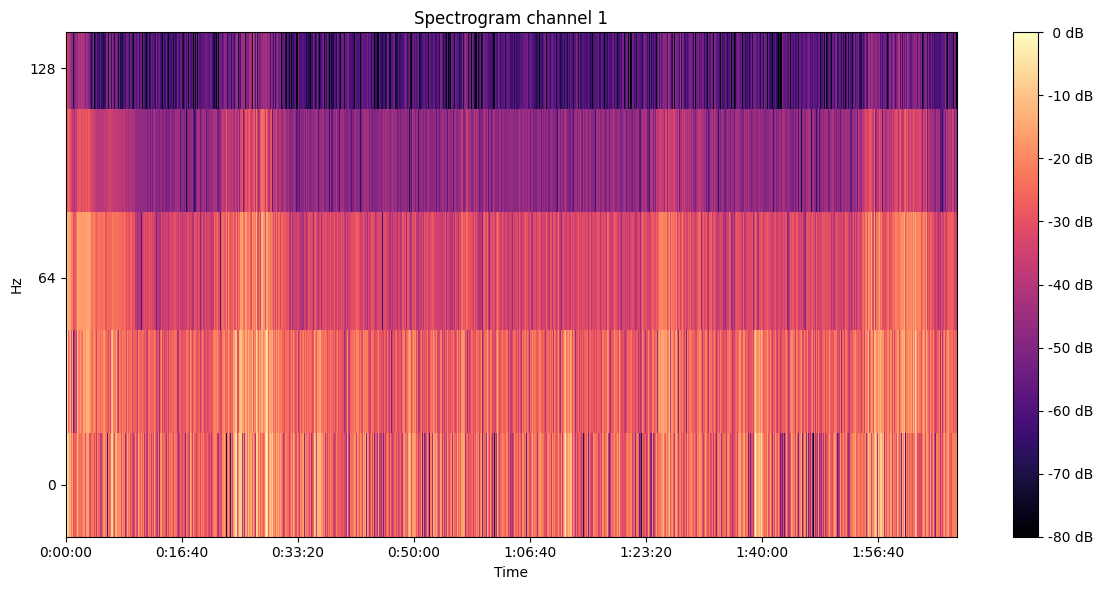

In [42]:
merged = create_spectrogram(subject[:])
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(merged[0], ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%2.0f dB')
plt.title('Spectrogram channel 0')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(merged[1], ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%2.0f dB')
plt.title('Spectrogram channel 1')
plt.tight_layout()
plt.show()

In [ ]:
files = [
    'FADHD',
    'FC',
    'MADHD',
    'MC'
]

spectrograms = []

for filename in files:
    file = loadmat(f'data/EEG/{filename}.mat')
    cells = file[filename]
    for cid in range(cells.shape[1]):
        